# Greed and Fear Index

In [1]:
import requests

url = 'https://api.alternative.me/fng/'
params = {'limit':100000,'date_format':'world'}
response = requests.get(url,params).json()

In [2]:
import pandas as pd

In [3]:
table= pd.DataFrame(response['data'])

In [4]:
table.head()

,value,value_classification,timestamp,time_until_update
0,25,Extreme Fear,06-12-2022,-1670229919
1,26,Fear,05-12-2022,NaN
2,26,Fear,04-12-2022,NaN
3,27,Fear,03-12-2022,NaN
4,27,Fear,02-12-2022,NaN


In [5]:
table.dtypes

value                   object
value_classification    object
timestamp               object
time_until_update       object
dtype: object

- Start date: 01-02-2018
- Total obs: 1760

# Cryptocurrencies exchange rates

## Cryptocurrencies (before 2018)

- Bitcoin (BTC) -2011
- Ethereum (ETH) - 2016
- Tether (USDT)- 2014
- Binance coin (BNB)- 2017
- Cardano (ADA) -2017
- Ripple (XRP) - 2012
- Dogecoin (DOGE) -2013
- Monero (XMR) - 2014
- Litecoin and Namecoin -2011

Total:9 

❌ This library interacts with the [CoinBase Pro API](https://pypi.org/project/Historic-Crypto/)

In [6]:
! pip install Historic-Crypto

In [7]:
from Historic_Crypto import HistoricalData

In [8]:
new = HistoricalData('ETH-USD',86400,'2022-06-01-00-00','2022-06-01-00-03',verbose = False).retrieve_data()

In [9]:
new

,low,high,open,close,volume
time,,,,,
2022-06-01,1761.59,1972.5,1940.49,1816.05,266690.7085


## ✅ API Source: [CoinAPI](https://docs.coinapi.io/?python#http-requests)

### Exchange rates

In [149]:
url = 'https://rest.coinapi.io/v1/exchangerate/BTC/USD/history?period_id=1DAY&time_start=2018-02-01T00:00:00&time_end=2022-12-02T00:00:00&limit=100000'
headers = {'X-CoinAPI-Key' : 'A100C8DD-420E-48A3-B17D-000AC6D20B7F'} #API-key
response = requests.get(url, headers=headers).json()
response

[{'time_period_start': '2018-02-01T00:00:00.0000000Z',
  'time_period_end': '2018-02-02T00:00:00.0000000Z',
  'time_open': '2018-02-01T00:01:00.0000000Z',
  'time_close': '2018-02-01T23:59:00.0000000Z',
  'rate_open': 10115.117506723707,
  'rate_high': 10159.478681510212,
  'rate_low': 8449.798622800827,
  'rate_close': 9041.746815490302},
 {'time_period_start': '2018-02-02T00:00:00.0000000Z',
  'time_period_end': '2018-02-03T00:00:00.0000000Z',
  'time_open': '2018-02-02T00:01:00.0000000Z',
  'time_close': '2018-02-02T23:59:00.0000000Z',
  'rate_open': 9008.07811595435,
  'rate_high': 9069.258639182885,
  'rate_low': 7568.776590578526,
  'rate_close': 8797.092611859549},
 {'time_period_start': '2018-02-03T00:00:00.0000000Z',
  'time_period_end': '2018-02-04T00:00:00.0000000Z',
  'time_open': '2018-02-03T00:01:00.0000000Z',
  'time_close': '2018-02-03T23:59:00.0000000Z',
  'rate_open': 8803.984327252676,
  'rate_high': 9457.891482409426,
  'rate_low': 8141.028790283776,
  'rate_close':

In [ ]:
#The function for cleaning the price data
def cleaning_price_data():
    #BTC_USD = Monica's function
    BTC_USD=pd.DataFrame(BTC_USD) # only needed if the returned is not in the form of dataframe
    BTC_USD.rename(columns={'time_close': 'timestamp'}, inplace = True)
    BTC_USD['timestamp'] = BTC_USD['timestamp'].apply(lambda x: x[0:10])#removing the time
    BTC_USD['timestamp'] =  pd.to_datetime(BTC_USD['timestamp'], yearfirst=True)
    BTC_USD= BTC_USD[['timestamp', 'rate_close']]#getting two columns
    
    retun BTC_USD

In [53]:
BTC_USD=response
BTC_USD=pd.DataFrame(BTC_USD)
BTC_USD.head()
BTC_USD.rename(columns={'time_close': 'timestamp'}, inplace = True)
BTC_USD['timestamp'] = BTC_USD['timestamp'].apply(lambda x: x[0:10])#removing the time
BTC_USD['timestamp'] =  pd.to_datetime(BTC_USD['timestamp'], yearfirst=True)
BTC_USD= BTC_USD[['timestamp', 'rate_close']]#getting two columns
BTC_USD

,timestamp,rate_close
0,2018-02-01,9041.746815
1,2018-02-02,8797.092612
2,2018-02-03,9203.247009
3,2018-02-04,8158.506315
4,2018-02-05,6893.694242
...,...,...
1761,2022-11-28,16207.746917
1762,2022-11-29,16431.933788
1763,2022-11-30,17166.772761
1764,2022-12-01,16967.867303


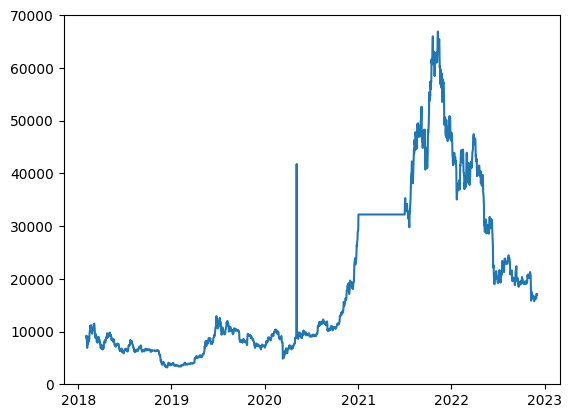

In [55]:
import matplotlib.pyplot as plt

plt.plot(BTC_USD['timestamp'], BTC_USD['rate_close'])

❌ [alphavantage](https://www.alphavantage.co/documentation/#currency-daily)- Weird format

In [56]:
url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=EUR&apikey=VJECCG7TZAYBOPJ1'
r = requests.get(url)
data = r.json()
data=pd.DataFrame((data))
print(data)

                                                              Meta Data  \
1. Information            Daily Prices and Volumes for Digital Currency   
2. Digital Currency Code                                            BTC   
3. Digital Currency Name                                        Bitcoin   
4. Market Code                                                      EUR   
5. Market Name                                                     Euro   
...                                                                 ...   
2020-03-16                                                          NaN   
2020-03-15                                                          NaN   
2020-03-14                                                          NaN   
2020-03-13                                                          NaN   
2020-03-12                                                          NaN   

                                       Time Series (Digital Currency Daily)  
1. Information       

### Exchange rates base asset identifier (market)

Documentation [here](https://docs.coinapi.io/#list-all-assets-get)

In [57]:
import requests
url = 'https://rest.coinapi.io/v1/assets'
headers = {'X-CoinAPI-Key' : '84C4284B-9B19-4BD8-8221-A1414D81024E'} #API-key
response = requests.get(url, headers=headers).json()

In [58]:
response

[{'asset_id': 'USD',
  'name': 'US Dollar',
  'type_is_crypto': 0,
  'data_quote_start': '2014-02-24T17:43:05.0000000Z',
  'data_quote_end': '2022-12-06T00:00:00.0000000Z',
  'data_orderbook_start': '2014-02-24T17:43:05.0000000Z',
  'data_orderbook_end': '2022-12-06T00:00:00.0000000Z',
  'data_trade_start': '2010-07-17T23:09:17.0000000Z',
  'data_trade_end': '2022-12-06T00:00:00.0000000Z',
  'data_symbols_count': 155998,
  'volume_1hrs_usd': 440006508168.19,
  'volume_1day_usd': 14724462645620.94,
  'volume_1mth_usd': 456413439401236.1,
  'id_icon': '0a4185f2-1a03-4a7c-b866-ba7076d8c73b',
  'data_start': '2010-07-17',
  'data_end': '2022-12-06'},
 {'asset_id': 'BTC',
  'name': 'Bitcoin',
  'type_is_crypto': 1,
  'data_quote_start': '2014-02-24T17:43:05.0000000Z',
  'data_quote_end': '2022-12-06T00:00:00.0000000Z',
  'data_orderbook_start': '2014-02-24T17:43:05.0000000Z',
  'data_orderbook_end': '2022-12-06T00:00:00.0000000Z',
  'data_trade_start': '2010-07-17T23:09:17.0000000Z',
  'dat

In [27]:
response
market=[i['asset_id'] for i in response]

TypeError: string indices must be integers

In [68]:
market #Example

['USD',
 'BTC',
 'PLN',
 'EUR',
 'CNY',
 'JPY',
 'AUD',
 'CHF',
 'SEK',
 'GBP',
 'DKK',
 'RUB',
 'SGD',
 'CAD',
 'NZD',
 'THB',
 'NIS',
 'LTC',
 'KRW',
 'VEN',
 'XRP',
 'NMC',
 'USDT',
 'DOGE',
 'BLC',
 'SLL',
 'NVC',
 'FTC',
 'PPC',
 'TRC',
 'SVC',
 'ORO',
 'TOR',
 'VEF',
 'KST',
 'BTS',
 'NXT',
 'BURST',
 'PKR',
 'SBC',
 'BITCNY',
 'DRK',
 'DARK',
 'U',
 'BRL',
 'CLP',
 'ARI',
 'MUE',
 'SONG',
 'CON',
 'NAV',
 'MCC',
 'RICE',
 'GEO',
 'BITSD',
 'QTL',
 'TOP',
 'RED',
 'ETCO',
 'NTC',
 'AMBER',
 'MTLMC',
 'GUN',
 'TIT',
 'MCL',
 'CRAVE',
 'FONZ',
 'SQL',
 'DUCK',
 'UNIC',
 'OZC',
 'LUX',
 'BOB',
 'AIB',
 'ACP',
 'BTX',
 'DRZ',
 'BSTY',
 'LOG',
 'FLN',
 'DEM',
 'CRW',
 'SKC',
 'ORB',
 'LTS',
 'MARS',
 'UNO',
 'SPN',
 'PND',
 'XVG',
 'DGB',
 'FUNK',
 'XMG',
 'SAK',
 'CCB',
 'XPD',
 'AC',
 '8BIT',
 'TES',
 'XFC',
 'ANI',
 'DUO',
 'PLC',
 'SHA',
 'SJW',
 '$PAC',
 'MOTO',
 'LEA',
 'FJC',
 'UNC',
 'SOON',
 'ADC',
 'BNX',
 'V',
 'POLY',
 'HYP',
 'TTC',
 'PIGGY',
 'ICB',
 'VGC',
 'ELC',
 'CTO

In [69]:
len(market)

16378

In [70]:
type(BTC_USD)

pandas.core.frame.DataFrame

In [29]:
df = BTC_USD.join(table, how="inner")
df

,error,faq_0,faq_1,faq_2,faq_3,value,value_classification,timestamp,time_until_update
0,Too many requests - You have exceeded your API...,Q: How requests are calculated? A: The request...,Q: How I can monitor number of requests left? ...,Q: I'm on Professional plan. How I can have mo...,Q: I'm on free plan and I didn't executed 100 ...,25,Extreme Fear,06-12-2022,-1670229919


## Data cleaning

In [96]:
df = df.drop(columns=['time_until_update', 'value_classification'])

In [98]:
df.dropna(inplace=True)

In [99]:
df

,time_period_start,time_period_end,time_open,time_close,rate_open,rate_high,rate_low,rate_close,value,timestamp
0,2018-02-01T00:00:00.0000000Z,2018-02-02T00:00:00.0000000Z,2018-02-01T00:01:00.0000000Z,2018-02-01T23:59:00.0000000Z,10115.117507,10159.478682,8449.798623,9041.746815,25,06-12-2022
1,2018-02-02T00:00:00.0000000Z,2018-02-03T00:00:00.0000000Z,2018-02-02T00:01:00.0000000Z,2018-02-02T23:59:00.0000000Z,9008.078116,9069.258639,7568.776591,8797.092612,26,05-12-2022
2,2018-02-03T00:00:00.0000000Z,2018-02-04T00:00:00.0000000Z,2018-02-03T00:01:00.0000000Z,2018-02-03T23:59:00.0000000Z,8803.984327,9457.891482,8141.028790,9203.247009,26,04-12-2022
3,2018-02-04T00:00:00.0000000Z,2018-02-05T00:00:00.0000000Z,2018-02-04T00:01:00.0000000Z,2018-02-04T23:59:00.0000000Z,9158.556949,9339.265715,7848.718987,8158.506315,27,03-12-2022
4,2018-02-05T00:00:00.0000000Z,2018-02-06T00:00:00.0000000Z,2018-02-05T00:01:00.0000000Z,2018-02-05T23:59:00.0000000Z,8192.982043,8334.261876,6479.390379,6893.694242,27,02-12-2022
...,...,...,...,...,...,...,...,...,...,...
1761,2022-11-28T00:00:00.0000000Z,2022-11-29T00:00:00.0000000Z,2022-11-28T00:00:00.0000000Z,2022-11-28T23:59:00.0000000Z,16419.925442,16474.841294,16007.520204,16207.746917,8,06-02-2018
1762,2022-11-29T00:00:00.0000000Z,2022-11-30T00:00:00.0000000Z,2022-11-29T00:00:00.0000000Z,2022-11-29T23:59:00.0000000Z,16205.427231,16521.464380,16096.212200,16431.933788,11,05-02-2018
1763,2022-11-30T00:00:00.0000000Z,2022-12-01T00:00:00.0000000Z,2022-11-30T00:00:00.0000000Z,2022-11-30T23:59:00.0000000Z,16436.943695,17224.683401,16429.145041,17166.772761,24,04-02-2018
1764,2022-12-01T00:00:00.0000000Z,2022-12-02T00:00:00.0000000Z,2022-12-01T00:00:00.0000000Z,2022-12-01T23:59:00.0000000Z,17167.088476,17222.674214,16873.231948,16967.867303,40,03-02-2018


## Exchange rates

In [83]:
url = 'https://api.apilayer.com/currency_data/convert?base=USD&symbols=EUR,GBP,JPY&amount=5&date=2022-12-02' 
headers = {'apikey' : 'pjbjm4QN5UOfyC9CrEYzQnV3ERHQG2q8 '} #API-key
response = requests.get(url, headers=headers).json()

In [84]:
response

{'message': 'You cannot consume this service'}

In [59]:
url = 'https://api.alternative.me/fng/'
params = {'limit':100000,'date_format':'world'}
response = requests.get(url,params).json()

In [60]:
response

{'name': 'Fear and Greed Index',
 'data': [{'value': '25',
   'value_classification': 'Extreme Fear',
   'timestamp': '06-12-2022',
   'time_until_update': '-1670235220'},
  {'value': '26', 'value_classification': 'Fear', 'timestamp': '05-12-2022'},
  {'value': '26', 'value_classification': 'Fear', 'timestamp': '04-12-2022'},
  {'value': '27', 'value_classification': 'Fear', 'timestamp': '03-12-2022'},
  {'value': '27', 'value_classification': 'Fear', 'timestamp': '02-12-2022'},
  {'value': '27', 'value_classification': 'Fear', 'timestamp': '01-12-2022'},
  {'value': '29', 'value_classification': 'Fear', 'timestamp': '30-11-2022'},
  {'value': '26', 'value_classification': 'Fear', 'timestamp': '29-11-2022'},
  {'value': '28', 'value_classification': 'Fear', 'timestamp': '28-11-2022'},
  {'value': '26', 'value_classification': 'Fear', 'timestamp': '27-11-2022'},
  {'value': '22',
   'value_classification': 'Extreme Fear',
   'timestamp': '26-11-2022'},
  {'value': '20',
   'value_classi

In [ ]:
#The function to clean the sentiment data
def cleaning_sentiment_data():
    fg= pd.DataFrame(response['data'])#necessary only if the input data is not in the shape of data frame
    fg['timestamp'] = pd.to_datetime(fg['timestamp'],dayfirst=True) # Converting string to timestamp.
    df=fg.merge(BTC_USD,how='left',on='timestamp')
    df.drop(columns=['time_until_update', 'value_classification'], inplace = True)
    df.dropna(inplace=True)
    df.set_index(['timestamp'], inplace = True)
    return df
    

In [62]:
## Turning into DataFrame
fg= pd.DataFrame(response['data'])
fg['timestamp'] = pd.to_datetime(fg['timestamp'],dayfirst=True) # Converting string to timestamp.
fg

,value,value_classification,timestamp,time_until_update
0,25,Extreme Fear,2022-12-06,-1670235220
1,26,Fear,2022-12-05,NaN
2,26,Fear,2022-12-04,NaN
3,27,Fear,2022-12-03,NaN
4,27,Fear,2022-12-02,NaN
...,...,...,...,...
1762,11,Extreme Fear,2018-02-05,NaN
1763,24,Extreme Fear,2018-02-04,NaN
1764,40,Fear,2018-02-03,NaN
1765,15,Extreme Fear,2018-02-02,NaN


### Optional: Add graphs with the current quotes for the exchanges with the selected cryptocurrency : idea [here](https://lewagon-alumni.slack.com/archives/D048CNCG5C2/p1669393053148439)

In [63]:
# Index and Crypto together
df=fg.merge(BTC_USD,how='left',on='timestamp')

In [64]:
df.head()

,value,value_classification,timestamp,time_until_update,rate_close
0,25,Extreme Fear,2022-12-06,-1670235220,NaN
1,26,Fear,2022-12-05,NaN,NaN
2,26,Fear,2022-12-04,NaN,NaN
3,27,Fear,2022-12-03,NaN,NaN
4,27,Fear,2022-12-02,NaN,16978.618788


In [70]:
df.drop(columns=['time_until_update'], inplace = True)
df

,value,value_classification,timestamp,rate_close
0,25,Extreme Fear,2022-12-06,NaN
1,26,Fear,2022-12-05,NaN
2,26,Fear,2022-12-04,NaN
3,27,Fear,2022-12-03,NaN
4,27,Fear,2022-12-02,16978.618788
...,...,...,...,...
1762,11,Extreme Fear,2018-02-05,6893.694242
1763,24,Extreme Fear,2018-02-04,8158.506315
1764,40,Fear,2018-02-03,9203.247009
1765,15,Extreme Fear,2018-02-02,8797.092612


In [71]:
df.drop(columns=['value_classification'], inplace = True)
df

,value,timestamp,rate_close
0,25,2022-12-06,NaN
1,26,2022-12-05,NaN
2,26,2022-12-04,NaN
3,27,2022-12-03,NaN
4,27,2022-12-02,16978.618788
...,...,...,...
1762,11,2018-02-05,6893.694242
1763,24,2018-02-04,8158.506315
1764,40,2018-02-03,9203.247009
1765,15,2018-02-02,8797.092612


In [72]:
df.dropna(inplace=True)

In [74]:
df.tail()

,value,timestamp,rate_close
1762,11,2018-02-05,6893.694242
1763,24,2018-02-04,8158.506315
1764,40,2018-02-03,9203.247009
1765,15,2018-02-02,8797.092612
1766,30,2018-02-01,9041.746815


In [77]:
df.set_index(['timestamp'], inplace = True)
df

,value,rate_close
timestamp,,
2022-12-02,27,16978.618788
2022-12-01,27,16967.867303
2022-11-30,29,17166.772761
2022-11-29,26,16431.933788
2022-11-28,28,16207.746917
...,...,...
2018-02-05,11,6893.694242
2018-02-04,24,8158.506315
2018-02-03,40,9203.247009


In [85]:
max(df['value'])

'95'

(0.0, 100.0)

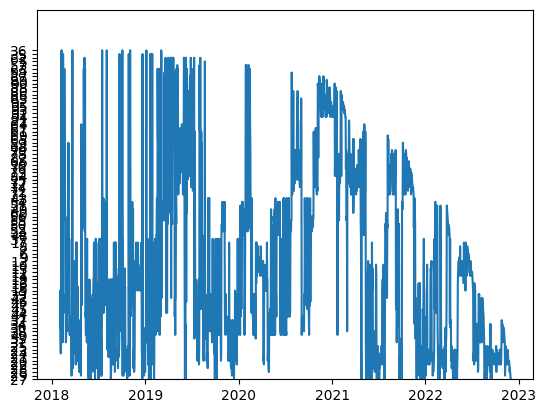

In [86]:
plt.plot(df['value'])
plt.ylim([0,100])

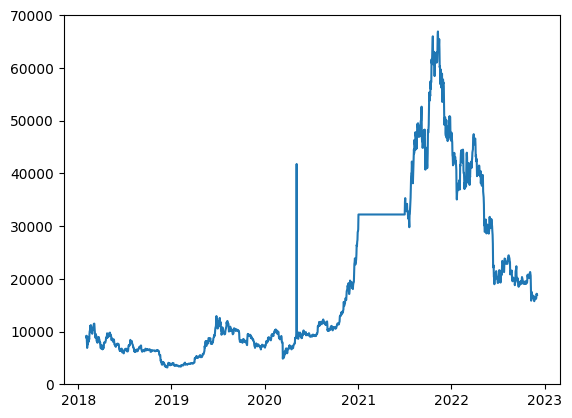

In [81]:
plt.plot(df['rate_close'])

In [88]:
df

,value,rate_close
timestamp,,
2022-12-02,27,16978.618788
2022-12-01,27,16967.867303
2022-11-30,29,17166.772761
2022-11-29,26,16431.933788
2022-11-28,28,16207.746917
...,...,...
2018-02-05,11,6893.694242
2018-02-04,24,8158.506315
2018-02-03,40,9203.247009


In [89]:
def currency_converter()-> pd.DataFrame:
    """Finding a fitting currency conversion API (Based on USD) and requesting the data as a function """

    APIkey = "j4YVbY4DsPe2bRdqchwWzvccCljEhg2EhlPyfrEN"
    url = f"https://api.freecurrencyapi.com/v1/latest?apikey={APIkey}"
    response = requests.get(url).json()
    df = pd.DataFrame(response['data'], index=[0])
    return df

In [92]:
currency_converter()

,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,EUR,GBP,...,PHP,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR
0,1.491238,1.864876,5.281559,1.359075,0.94251,6.962087,23.146603,7.085729,0.95271,0.820257,...,56.03624,4.489163,4.685132,60.551375,10.40846,1.356629,35.050503,18.629891,1,17.458546


In [90]:
def fgindex() -> pd.DataFrame:
    """returns a dataframe of fear and greed index with columns:
    [value],[value_classification],[timestamp],[time_until_update] """

    url = 'https://api.alternative.me/fng/'
    params = {'limit':100000,'date_format':'world'}
    response = requests.get(url,params).json()
    fg = pd.DataFrame(response['data'])
    return fg


In [93]:
fgindex()

,value,value_classification,timestamp,time_until_update
0,25,Extreme Fear,06-12-2022,-1670240639
1,26,Fear,05-12-2022,NaN
2,26,Fear,04-12-2022,NaN
3,27,Fear,03-12-2022,NaN
4,27,Fear,02-12-2022,NaN
...,...,...,...,...
1762,11,Extreme Fear,05-02-2018,NaN
1763,24,Extreme Fear,04-02-2018,NaN
1764,40,Fear,03-02-2018,NaN
1765,15,Extreme Fear,02-02-2018,NaN


In [155]:

def prices(crypto)-> pd.DataFrame:
    """returns a dataframe with columns:
    ['time_period_start'], ['time_period_end'], ['time_open'], ['time_close'],
    ['rate_open'], ['rate_high'], ['rate_low'], ['rate_close'] """

    today = datetime.datetime.today()
    today = today.date()
    yesterday = today- timedelta(days=1)
    #key = os.environ.get('API_Key')#
    url = f'https://rest.coinapi.io/v1/exchangerate/{crypto}/USD/history?period_id=1DAY&time_start=2018-02-01T00:00:00&time_end={yesterday}T00:00:00&limit=100000'
    headers = {'X-CoinAPI-Key' : 'A100C8DD-420E-48A3-B17D-000AC6D20B7FE'} #API-key 
    response = requests.get(url, headers=headers).json()
    crypto = pd.DataFrame(response)
    return crypto

In [152]:
from datetime import timedelta
today = datetime.datetime.today()
today= today.date()
yesterday = today- timedelta(days=1)
crypto='BTC'
url = f'https://rest.coinapi.io/v1/exchangerate/{crypto}/USD/history?period_id=1DAY&time_start=2018-02-01T00:00:00&time_end={yesterday}T00:00:00&limit=100000'
url

#today
check =requests.get(url, headers=headers).json()
check

[{'time_period_start': '2018-02-01T00:00:00.0000000Z',
  'time_period_end': '2018-02-02T00:00:00.0000000Z',
  'time_open': '2018-02-01T00:01:00.0000000Z',
  'time_close': '2018-02-01T23:59:00.0000000Z',
  'rate_open': 10115.117506723707,
  'rate_high': 10159.478681510212,
  'rate_low': 8449.798622800827,
  'rate_close': 9041.746815490302},
 {'time_period_start': '2018-02-02T00:00:00.0000000Z',
  'time_period_end': '2018-02-03T00:00:00.0000000Z',
  'time_open': '2018-02-02T00:01:00.0000000Z',
  'time_close': '2018-02-02T23:59:00.0000000Z',
  'rate_open': 9008.07811595435,
  'rate_high': 9069.258639182885,
  'rate_low': 7568.776590578526,
  'rate_close': 8797.092611859549},
 {'time_period_start': '2018-02-03T00:00:00.0000000Z',
  'time_period_end': '2018-02-04T00:00:00.0000000Z',
  'time_open': '2018-02-03T00:01:00.0000000Z',
  'time_close': '2018-02-03T23:59:00.0000000Z',
  'rate_open': 8803.984327252676,
  'rate_high': 9457.891482409426,
  'rate_low': 8141.028790283776,
  'rate_close':

In [127]:
url2 = 'https://rest.coinapi.io/v1/exchangerate/BTC/USD/history?period_id=1DAY&time_start=2018-02-01T00:00:00&time_end=2022-12-02T00:00:00&limit=100000'
url2


'https://rest.coinapi.io/v1/exchangerate/BTC/USD/history?period_id=1DAY&time_start=2018-02-01T00:00:00&time_end=2022-12-02T00:00:00&limit=100000'

In [168]:
url2 = 'https://rest.coinapi.io/v1/exchangerate/BTC/USD/history?period_id=1DAY&time_start=2018-02-01T00:00:00&time_end=2022-12-02T00:00:00&limit=100000'
headers = {'X-CoinAPI-Key' : '66904EF7-7942-4757-99A3-AC7431E5F4C5'} #API-key
response = requests.get(url, headers=headers).json()
response

{'error': "Invalid API key. If this is a new API Key, then we need a few minutes to propagate the new key through our independent server sites. This behavior is by design as our multiple geographical independent sites are designed to be highly available, and we didn't have a single point where the API keys are stored."}

In [169]:
today = datetime.datetime.today()
today = today.date()
yesterday = today- timedelta(days=1)
#key = os.environ.get('API_Key')#
url = f'https://rest.coinapi.io/v1/exchangerate/{crypto}/USD/history?period_id=1DAY&time_start=2018-02-01T00:00:00&time_end={yesterday}T00:00:00&limit=100000'
headers = {'X-CoinAPI-Key' : 'A100C8DD-420E-48A3-B17D-000AC6D20B7F'} #API-key 
response = requests.get(url, headers=headers).json()
response

{'error': 'Too many requests - You have exceeded your API key last 24 hour requests executed limit, please wait for new requests or contact support for upgrading your existing plan or enabling overage.',
 'faq_0': 'Q: How requests are calculated? A: The request is a single API call to our REST API without `limit` parameter. Or with `limit` parameter, the request is counted every 100 data points returned by the API.',
 'faq_1': 'Q: How I can monitor number of requests left? A: Every authenticated API call providing information about the current state of the limits in the HTTP response headers, more info here: https://docs.coinapi.io/#request-limits',
 'faq_2': "Q: I'm on Professional plan. How I can have more requests? A: Please contact support at the https://www.coinapi.io/support for more information.",
 'faq_3': "Q: I'm on free plan and I didn't executed 100 requests yet and got 429 error. A: Free plan contains additional limitations to prevent fraud and usage of the multiple free AP

In [156]:
import datetime
prices('BTC')

ValueError: If using all scalar values, you must pass an index

In [164]:
from gossips_cryptos.data import price

ModuleNotFoundError: No module named 'gossips_cryptos'

In [ ]:
#The all in one function
def data_cleaning(crypto):
    #cleaning the price data
    BTC_USD = prices(crypto)
    #BTC_USD=pd.DataFrame(BTC_USD) # only needed if the returned is not in the form of dataframe
    BTC_USD.rename(columns={'time_close': 'timestamp'}, inplace = True)
    BTC_USD['timestamp'] = BTC_USD['timestamp'].apply(lambda x: x[0:10])#removing the time
    BTC_USD['timestamp'] =  pd.to_datetime(BTC_USD['timestamp'], yearfirst=True)
    BTC_USD= BTC_USD[['timestamp', 'rate_close']]#getting two columns
    
    #cleaning the sentiment data
    #response = Monica's function
    fg= pd.DataFrame(response['data'])#necessary only if the input data is not in the shape of data frame
    fg['timestamp'] = pd.to_datetime(fg['timestamp'],dayfirst=True) # Converting string to timestamp.
    
    #merging the price and sentiment data
    df=fg.merge(BTC_USD,how='left',on='timestamp')
    
    #cleaning the merged dataframe
    df.drop(columns=['time_until_update', 'value_classification'], inplace = True)
    df.dropna(inplace=True)
    df.set_index(['timestamp'], inplace = True)
    
    return df

In [ ]:
#definig X and y 
X = 

In [ ]:
X = df['value']

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
#we have to figure out what would be the shape of our X and y
#scaling function
def scaling():
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    scaler.fit(y)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)
    
    return X_train, X_test, y_train, y_test